In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [46]:
def gen_f1_plot(csv_names, model_names):
    if len(csv_names) != len(model_names):
        print('Number of CSV files don\'t match model names')
        return

    dfs = []
    for i in range(len(csv_names)):
        df = pd.read_csv(f'f1scores/{csv_names[i]}.csv')
        df.insert(0, 'Model', model_names[i], True)
        dfs.append(df)
    
    all_df = pd.concat(dfs, ignore_index = True, sort = False)
    all_df.groupby('Model')
    sns.set_style('whitegrid')

    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    g = sns.lineplot(ax = ax, x = 'Threshold', y = 'F1', hue = 'Model', marker = 'o', data = all_df)
    ax.set(xlabel = 'IoU Threshold', ylabel = 'F1 Score')
    plt.setp(g.collections, alpha=.8) #for the markers
    plt.setp(g.lines, alpha=.8)       #for the lines

## Watershed

(0.0, 1.0)

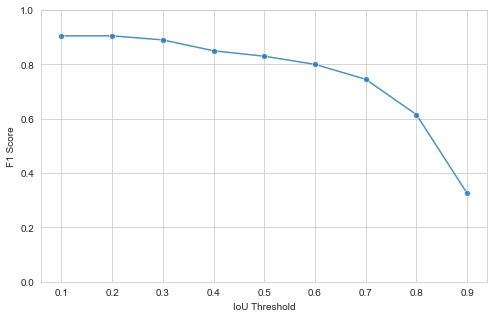

In [47]:
csv_names = ['watershed']
model_names = ['U2OS']
gen_f1_plot(csv_names, model_names)
plt.ylim([0, 1])

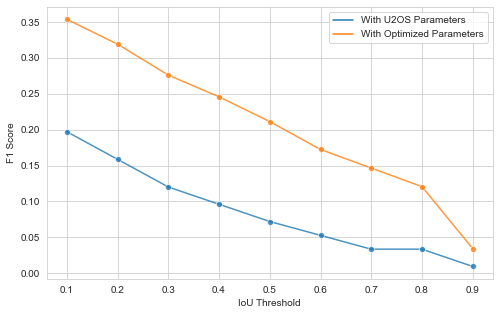

In [37]:
csv_names = ['4t1_watershed', '4t1_watershed_opt']
model_names = ['With U2OS Parameters', 'With Optimized Parameters']
gen_f1_plot(csv_names, model_names)

## Pretrained StarDist vs Pretrained StarDist + 5/10 Additional Nuclei Images

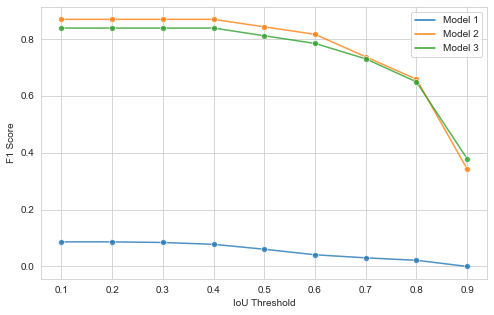

In [38]:
csv_names = ['pretrained_stardist', 'pretrained_add5', 'pretrained_add10']
model_names = ['Model 1', 'Model 2', 'Model 3']
gen_f1_plot(csv_names, model_names)

## StarDist with Augmenters

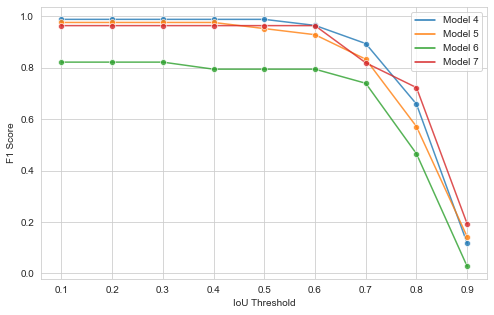

In [39]:
csv_names = ['stardist', 'aug_fliprot', 'aug_intensity', 'aug_noise']
model_names = ['Model 4', 'Model 5', 'Model 6', 'Model 7']
gen_f1_plot(csv_names, model_names)

## StarDist with smFISH Input

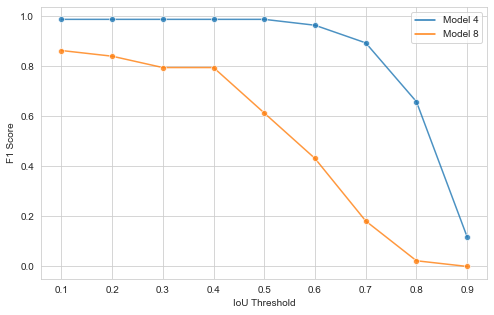

In [40]:
csv_names = ['stardist', 'smfish']
model_names = ['Model 4', 'Model 8']
gen_f1_plot(csv_names, model_names)

## All Models on 4t1 Cells

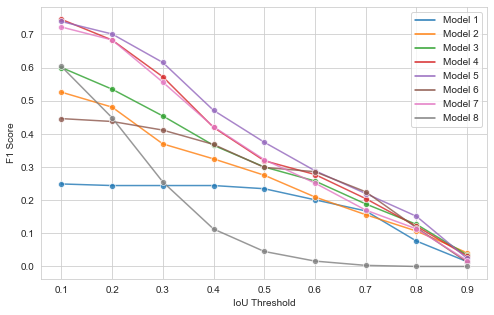

In [41]:
csv_names = ['4t1_pretrained', '4t1_pretrained_add5', '4t1_pretrained_add10', '4t1_stardist', 
             '4t1_aug_fliprot', '4t1_aug_intensity', '4t1_aug_noise', '4t1_smfish_stardist']
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4',
               'Model 5', 'Model 6', 'Model 7', 'Model 8']
gen_f1_plot(csv_names, model_names)

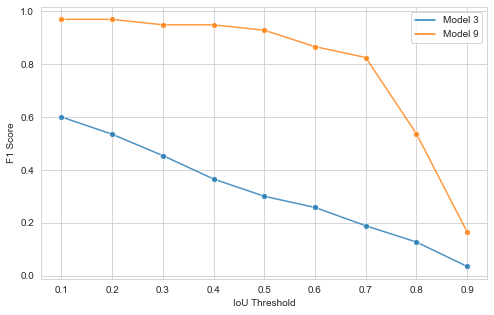

In [43]:
csv_names = ['4t1_pretrained_add10', '4t1_pretrained_add10_add4t1_stardist']
model_names = ['Model 3', 'Model 9']
gen_f1_plot(csv_names, model_names)